# Сводный проспект

В распоряжении данные  до 2016 года интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


Описание данных:

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Импортируем библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

Изучаем данные

In [2]:
import os

pth1 = 'games.csv'
pth2 = '/datasets/games.csv'

if os.path.exists(pth1):
    df = pd.read_csv(pth1)
elif os.path.exists(pth2):
    df = pd.read_csv(pth2)
else:
    print('Something is wrong')

In [5]:
df.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
df.duplicated().sum()

0

<b><p style="font-size: 20px;">Подготовка данных.</p></b>

In [8]:
df.columns = [x.lower() for x in df.columns]

In [9]:
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [10]:
print(df['platform'].unique())

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


In [11]:
print(df['rating'].unique())

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


In [12]:
print(df['critic_score'].unique())

[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 35. 41. 36.
 28. 31. 27. 26. 19. 23. 24. 21. 17. 22. 13.]


In [13]:
print(df['user_score'].unique())

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


In [14]:
print(df['rating'].unique())

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


Проверем нуливые значения вдатасете

In [15]:
df.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Удаляем пропуски

In [16]:
df = df.drop_duplicates().reset_index(drop=True)

In [17]:
print(df[df['user_score'] == 'tbd']['user_score'].count())

2424


Аббревиатура 'tbd'  означает, что на момент выгрузки датафрейма рейтинг не был определен. соответственно его имеет смысл заполнить пропусками, тк строки с этим значением превышают 10% от датафрейма - удалять их не стоит, что позволит в дальнейшем проводить корректный анализ

переводим столбец 'user_score' в цифровой формат. По этому прописываем errors='coerce' чтобы некорректные значения принудительно заменялись на NaN

In [18]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

In [19]:
print('tbd' in df['user_score'].to_list())

False


 Столбцец 'year_of_release' заполняем нулями и переводим в целочисленный формат

In [20]:
df['year_of_release'] = df['year_of_release'].fillna(0)

In [21]:
df['year_of_release'] = df['year_of_release'].astype('int')

In [22]:
for col in df.columns:
    pct_missing = np.mean(df[col].isna())
    print('{} - {}%'.format(col, round(pct_missing*100,2)))

name - 0.01%
platform - 0.0%
year_of_release - 0.0%
genre - 0.01%
na_sales - 0.0%
eu_sales - 0.0%
jp_sales - 0.0%
other_sales - 0.0%
critic_score - 51.32%
user_score - 54.59%
rating - 40.48%


Проверяем формат данных в датасете

In [23]:
df.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

считаем общие продажи по всем регионам и добавляем в новый столбец 'total_sale'

In [24]:
df['total_sale'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [25]:
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


<b><p style="font-size: 20px;">Исследовательский анализ данных</p></b>

Выявляем у скольки игр не указан год выпуска:

In [26]:
print(df['year_of_release'].value_counts())

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
0        269
1996     263
1995     219
1994     121
1993      62
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64


Делаем срез по годам и изключаем строки с нулевыми годами, тк востановить в каком году были выпущены игры нет возможно

In [27]:
df_game =df.query('year_of_release !=0')

In [28]:
df_game['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      62
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1987      16
1990      16
1988      15
1984      14
1985      14
1980       9
Name: year_of_release, dtype: int64

Делаем сводную таблицу по платформам и продажам игр

In [29]:
game_range = df_game.pivot_table(index='platform', 
                            values='total_sale', aggfunc='count')

In [30]:
game_range = game_range.reset_index()
columns=['platform', 'total_sale'] 

In [31]:
game_range = game_range.query('total_sale >100')


<div class="alert alert-block alert-info">
В данной сводной таблице мы сопоставяем платформы и количество проданных игр для этих платформ. затем огранииваем количество продаж - все что меньше 100млн, для того чтобы убрать платформы дл которых выпускается слишком мало игр
    

In [32]:
game_range.reset_index(drop=True, inplace=True)
game_range

,platform,total_sale
0,2600,116
1,3DS,512
2,DS,2121
3,GBA,811
4,GC,542
5,N64,316
6,PC,957
7,PS,1190
8,PS2,2127
9,PS3,1306


Создаем список платформ:

In [33]:
platform_list_1 = game_range['platform'].to_list()


In [34]:
platform_list = []

for i in game_range['platform']:
    platform_list.append(i)
platform_list    

['2600',
 '3DS',
 'DS',
 'GBA',
 'GC',
 'N64',
 'PC',
 'PS',
 'PS2',
 'PS3',
 'PS4',
 'PSP',
 'PSV',
 'SAT',
 'SNES',
 'Wii',
 'WiiU',
 'X360',
 'XB',
 'XOne']

создаем дублированный датасет по списку платформ

In [35]:
df_game_over_20= df_game[df_game['platform'].isin(platform_list)]
df_game_over_20.reset_index(drop=True, inplace=True)
df_game_over_20

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
2,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
3,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
4,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16134,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16135,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16136,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16137,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


<div class="alert alert-block alert-info">
Для того чтобы не учитывать непопулярные платформы, мы трансформируем датафрейм и оставляем 20 платформ по которым сумарные продажы более 100млн 


строим график по  количеству игр выходивших и выходящих на платформах

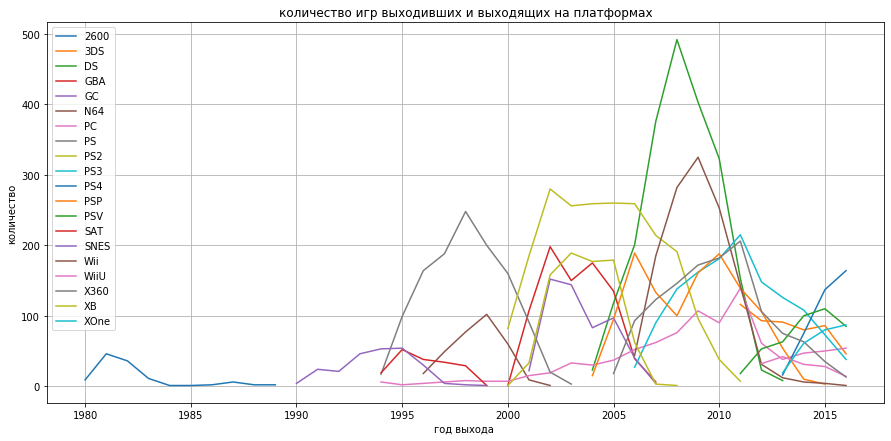

In [36]:
pivot_df = pd.pivot_table(df_game_over_20, index='year_of_release', columns='platform', values = 'name', aggfunc='count')

fig, ax = plt.subplots()
ax.plot(pivot_df)

plt.title('количество игр выходивших и выходящих на платформах')
ax.set_xlabel('год выхода ')
ax.set_ylabel('количество')
ax.legend(platform_list)
fig.set_figwidth(15)
fig.set_figheight(7)
ax.grid()
plt.show()

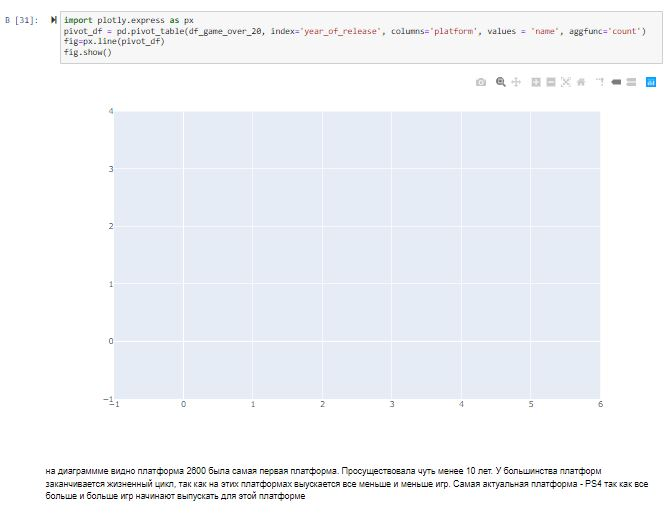

на диаграммме видно платформа 2600 была самая первая платформа. Просуществовала чуть менее 10 лет. У большинства платформ заканчивается жизненный цикл, так как на этих платформах выускается все меньше и меньше игр. Самая актуальная платформа - РS4 так как все больше и больше игр начинают выпускать для этой платформе

определем жизненный цикл платформ 

In [37]:
game_life = df_game_over_20.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max'])

game_life = game_life.reset_index()
game_life.columns=['platform', 'release', 'current_status'] 
game_life 

,platform,release,current_status
0,2600,1980,1989
1,3DS,2011,2016
2,DS,1985,2013
3,GBA,2000,2007
4,GC,2001,2007
5,N64,1996,2002
6,PC,1985,2016
7,PS,1994,2003
8,PS2,2000,2011
9,PS3,2006,2016


In [38]:
game_life['lifecycle']= game_life['current_status'] - game_life['release']
game_life

,platform,release,current_status,lifecycle
0,2600,1980,1989,9
1,3DS,2011,2016,5
2,DS,1985,2013,28
3,GBA,2000,2007,7
4,GC,2001,2007,6
5,N64,1996,2002,6
6,PC,1985,2016,31
7,PS,1994,2003,9
8,PS2,2000,2011,11
9,PS3,2006,2016,10


средний жизненный цикл платформы

In [39]:
print(game_life['lifecycle'].median())


8.5


In [40]:
game_life_pivot = game_life.pivot_table( index=['release', 'platform'] ).sort_values(by='release')
game_life_pivot

current_status  lifecycle
release platform                           
1980    2600                1989          9
1985    DS                  2013         28
        PC                  2016         31
1990    SNES                1999          9
1994    PS                  2003          9
        SAT                 1999          5
1996    N64                 2002          6
2000    PS2                 2011         11
        XB                  2008          8
        GBA                 2007          7
2001    GC                  2007          6
2004    PSP                 2015         11
2005    X360                2016         11
2006    PS3                 2016         10
        Wii                 2016         10
2011    3DS                 2016          5
        PSV                 2016          5
2012    WiiU                2016          4
2013    PS4                 2016          3
        XOne                2016          3

Актуальный срок берем: по играм вышедшим на платформах с 2014 года:

In [41]:

current_platform = df_game_over_20.query('year_of_release >= 2014')

current_platform

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
23,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
34,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
39,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
68,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
78,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16127,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16131,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16134,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16136,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [42]:
current_platform['rating'] = current_platform['rating'].fillna('unknown')
current_platform

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
23,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
34,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
39,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
68,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
78,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16127,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16131,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16134,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16136,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


группируем данные по лидирующим патформам и  продажам по эти платформам

In [43]:
leader_game_platform_range_top = current_platform.pivot_table(index='platform',
                            values='total_sale', aggfunc='sum').sort_values(by= 'total_sale', ascending=False).reset_index()
leader_game_platform_range_top

,platform,total_sale
0,PS4,288.15
1,XOne,140.36
2,3DS,86.68
3,PS3,68.18
4,X360,48.22
5,WiiU,42.98
6,PC,27.05
7,PSV,22.40
8,Wii,5.07
9,PSP,0.36


формируем датафрейм с учетом выбранных топ платформ

In [44]:
leader_game_platforms_sale = current_platform[current_platform['platform'].isin(leader_game_platform_range_top['platform'])]
leader_game_platforms_sale['critic_score'] = leader_game_platforms_sale['critic_score'] / 10

leader_game_platforms_sale

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
23,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
34,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,9.7,8.3,M,12.62
39,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
68,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,8.2,4.3,E,8.58
78,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16127,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16131,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16134,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16136,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


In [45]:
leader_game_platforms_sale['rating'].unique()

array(['unknown', 'M', 'E', 'T', 'E10+'], dtype=object)

По данным топ платформ строим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

In [46]:
profitable_platforms_actual = leader_game_platforms_sale.pivot_table(index=['platform','year_of_release'], values='total_sale',
                                                                    ).reset_index()


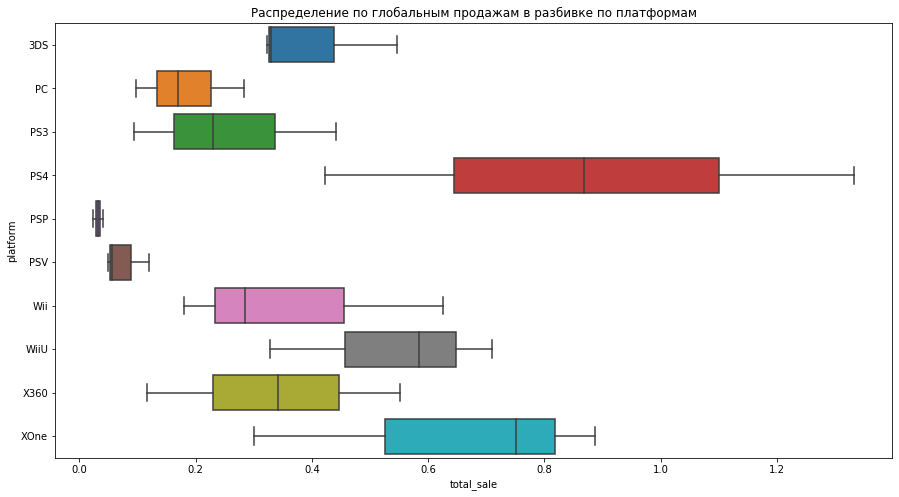

In [47]:
fig, ax = plt.subplots(figsize=(15,8))
sns.boxplot(data=profitable_platforms_actual, x='total_sale', y='platform')
plt.title('Распределение по глобальным продажам в разбивке по платформам')
plt.xlabel=('Платформы')
plt.ylabel=('глобальные продажи')



На графике видно для каких платформ было больше всего продано игр. Самая популярная платформа -  PS4. Вторая по полулрности - XOne. Затем идет WiiU  

<b>Определяем влияние оценок критиков и пользователей на продажи по разным платформам </b>

In [48]:
influence_on_platform = leader_game_platforms_sale.pivot_table(index=['platform', 'total_sale'], 
                                                               values=['critic_score','user_score']).reset_index()
# influence_on_platform_3DS = influence_on_platform[influence_on_platform['platform'] == '3DS']
# influence_on_platform_3DS

In [49]:
influence_on_platform_PS4 = influence_on_platform[influence_on_platform['platform'] == 'PS4']
influence_on_platform_PS4

,platform,total_sale,critic_score,user_score
168,PS4,0.01,5.700000,5.777778
169,PS4,0.02,6.364286,6.713333
170,PS4,0.03,6.971429,7.083333
171,PS4,0.04,7.471429,7.425000
172,PS4,0.05,6.690909,6.818182
...,...,...,...,...
294,PS4,7.17,8.700000,6.500000
295,PS4,7.60,8.500000,5.000000
296,PS4,7.66,8.300000,5.700000
297,PS4,8.58,8.200000,4.300000


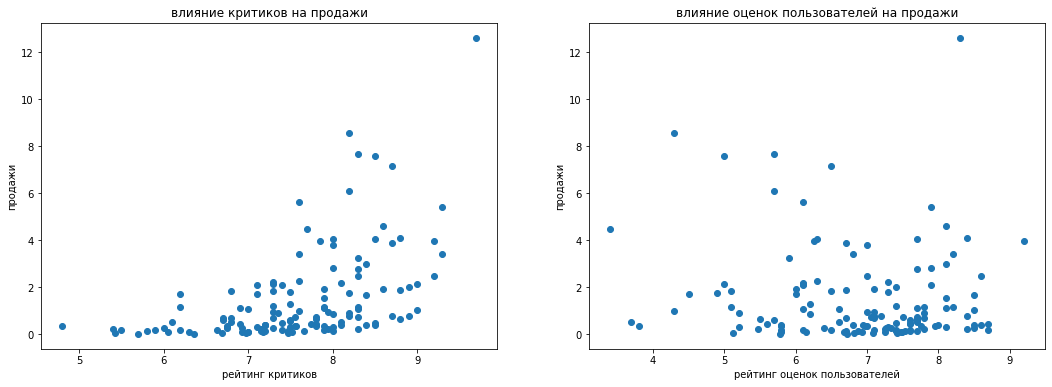

In [50]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
ax1.scatter(x = influence_on_platform_PS4['critic_score'], y = influence_on_platform_PS4['total_sale'])
ax1.set_title('влияние критиков на продажи')
ax1.set_xlabel('рейтинг критиков')
ax1.set_ylabel('продажи')

ax2.scatter(x = influence_on_platform_PS4['user_score'], y = influence_on_platform_PS4['total_sale'])
ax2.set_title('влияние оценок пользователей на продажи')
ax2.set_xlabel('рейтинг оценок пользователей')
ax2.set_ylabel('продажи')
fig.set_figwidth(18)
fig.set_figheight(6)
plt.show()

In [51]:
print('Коэффицент корреляции Пирсона влияния  оценок критиков на продажи игр на платформе PS4 {}'.format(influence_on_platform_PS4['critic_score'].corr(influence_on_platform_PS4['total_sale'])))
print('Коэффицент корреляции Пирсона влияния  оценок пользователей на продажи игр на платформе PS4 {}'.format(influence_on_platform_PS4['user_score'].corr(influence_on_platform_PS4['total_sale'])))

Коэффицент корреляции Пирсона влияния  оценок критиков на продажи игр на платформе PS4 0.5041821882208588
Коэффицент корреляции Пирсона влияния  оценок пользователей на продажи игр на платформе PS4 -0.10775614805770269


 Из расчета коэфициентов Пирсона видно, что оценки критиков  влияют на продажи игр на платформе PS4. оценки пользователей не  влияют на продажи игр на этой платформе   

In [52]:
influence_on_platform_WiiU = influence_on_platform[influence_on_platform['platform'] == 'WiiU']
influence_on_platform_WiiU

,platform,total_sale,critic_score,user_score
341,WiiU,0.01,7.50,6.820000
342,WiiU,0.03,4.80,5.566667
343,WiiU,0.06,6.60,7.800000
344,WiiU,0.07,4.30,6.750000
345,WiiU,0.09,4.70,4.900000
346,WiiU,0.10,8.80,8.300000
347,WiiU,0.11,6.70,7.600000
348,WiiU,0.12,4.50,6.500000
349,WiiU,0.13,6.20,6.400000
350,WiiU,0.15,7.40,8.000000


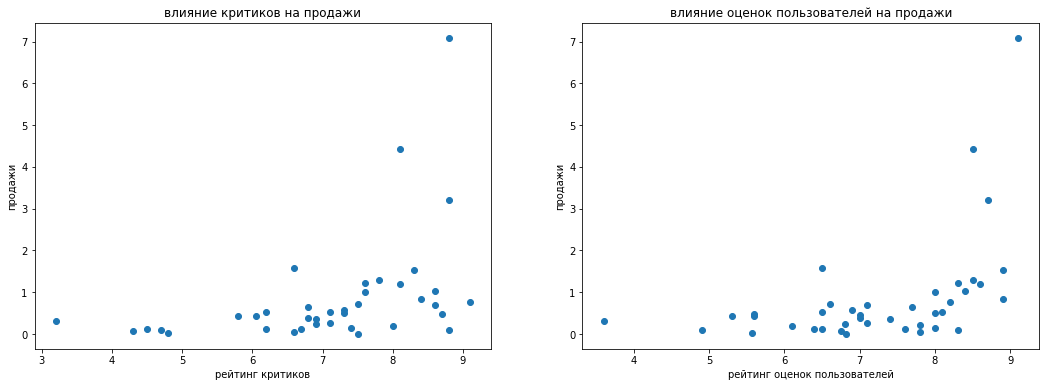

In [53]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
ax1.scatter(x = influence_on_platform_WiiU['critic_score'], y = influence_on_platform_WiiU['total_sale'])
ax1.set_title('влияние критиков на продажи')
ax1.set_xlabel('рейтинг критиков')
ax1.set_ylabel('продажи')

ax2.scatter(x = influence_on_platform_WiiU['user_score'], y = influence_on_platform_WiiU['total_sale'])
ax2.set_title('влияние оценок пользователей на продажи')
ax2.set_xlabel('рейтинг оценок пользователей')
ax2.set_ylabel('продажи')
fig.set_figwidth(18)
fig.set_figheight(6)

plt.show()

In [54]:
print('Коэффицент корреляции Пирсона влияния  оценок критиков на продажи игр на платформе WiiU {}'.format(influence_on_platform_WiiU['critic_score'].corr(influence_on_platform_WiiU['total_sale'])))
print('Коэффицент корреляции Пирсона влияния  оценок пользователей на продажи игр на платформе WiiU {}'.format(influence_on_platform_WiiU['user_score'].corr(influence_on_platform_WiiU['total_sale'])))

Коэффицент корреляции Пирсона влияния  оценок критиков на продажи игр на платформе WiiU 0.4146950305981556
Коэффицент корреляции Пирсона влияния  оценок пользователей на продажи игр на платформе WiiU 0.4633299846993938


Исходя из расчетов видно что оценки пользователей немного больше влияют на продажи игр  на платформе WiiU чем оценки критиков

In [55]:
influence_on_platform_XOne = influence_on_platform[influence_on_platform['platform'] == 'XOne']
influence_on_platform_XOne

,platform,total_sale,critic_score,user_score
437,XOne,0.01,6.611111,6.931250
438,XOne,0.02,6.171429,6.300000
439,XOne,0.03,6.950000,5.480000
440,XOne,0.04,7.616667,7.183333
441,XOne,0.05,5.000000,5.733333
...,...,...,...,...
535,XOne,3.50,7.200000,4.100000
536,XOne,4.22,8.800000,6.200000
537,XOne,4.49,8.400000,6.400000
538,XOne,5.26,8.100000,5.400000


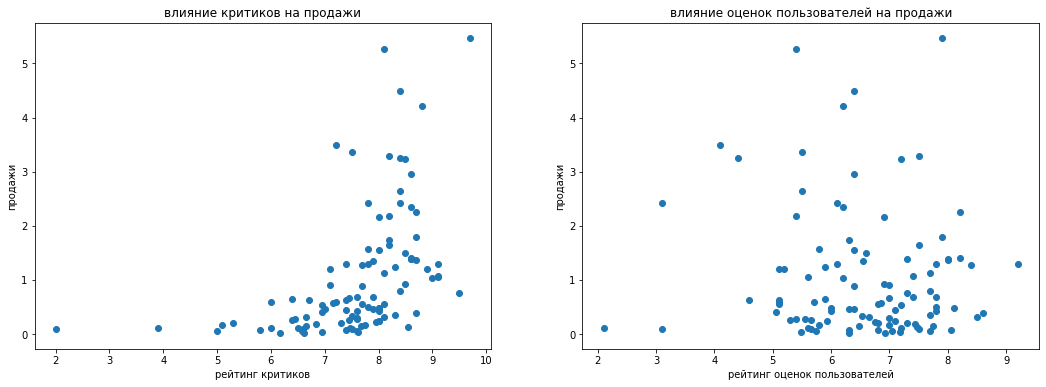

In [56]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
ax1.scatter(x = influence_on_platform_XOne['critic_score'], y = influence_on_platform_XOne['total_sale'])
ax1.set_title('влияние критиков на продажи')
ax1.set_xlabel('рейтинг критиков')
ax1.set_ylabel('продажи')

ax2.scatter(x = influence_on_platform_XOne['user_score'], y = influence_on_platform_XOne['total_sale'])
ax2.set_title('влияние оценок пользователей на продажи')
ax2.set_xlabel('рейтинг оценок пользователей')
ax2.set_ylabel('продажи')
fig.set_figwidth(18)
fig.set_figheight(6)
plt.show()

In [57]:
print('Коэффицент корреляции Пирсона влияния  оценок критиков на продажи игр на платформе XOne {}'.format(influence_on_platform_XOne['critic_score'].corr(influence_on_platform_XOne['total_sale'])))
print('Коэффицент корреляции Пирсона влияния оценок пользователей на продажи игр на платформе XOne {}'.format(influence_on_platform_XOne['user_score'].corr(influence_on_platform_XOne['total_sale'])))

Коэффицент корреляции Пирсона влияния  оценок критиков на продажи игр на платформе XOne 0.46241089806976915
Коэффицент корреляции Пирсона влияния оценок пользователей на продажи игр на платформе XOne -0.07609195365431025


Коэффицент корреляции Пирсона показываетчто оценки критиков  влияют на продажи игр на платформе Х360, а оценки пользователей не влияют на продажи

<b>Рейтинг жанров</b>

In [58]:
top_genre_games = leader_game_platforms_sale.pivot_table(index='genre', values='total_sale', 
                                                         aggfunc='sum').sort_values(by='total_sale', ascending=False).reset_index()
top_genre_games

,genre,total_sale
0,Action,199.36
1,Shooter,170.94
2,Sports,109.48
3,Role-Playing,101.44
4,Misc,37.55
5,Fighting,28.22
6,Racing,27.52
7,Platform,18.09
8,Adventure,17.55
9,Simulation,13.13


Построили сводную таблицу  жанров игр. Самые полулярные игры: экшен, шутеры и спортивные игры. не популярные - приключени, стратегии и пазлы

<b><p style="font-size: 20px;">Портрет пользователя каждого региона.</p></b>


<b>топ 5 полатформ для 3-х регионов</b>

In [59]:
na_top_platforms = leader_game_platforms_sale.pivot_table(index='platform', values='na_sales', 
                                                    aggfunc='sum').sort_values(by='na_sales', ascending=False).reset_index()


In [60]:
na_top5_platforms = na_top_platforms.query('index<5')
na_top5_platforms

,platform,na_sales
0,PS4,98.61
1,XOne,81.27
2,X360,28.30
3,3DS,22.64
4,PS3,22.05


In [61]:
pd.set_option('mode.chained_assignment', None)
na_top5_platforms['ratio'] = (na_top5_platforms['na_sales'] / current_platform['na_sales'].sum())*100
na_top5_platforms.round(decimals=2)


,platform,na_sales,ratio
0,PS4,98.61,34.71
1,XOne,81.27,28.61
2,X360,28.30,9.96
3,3DS,22.64,7.97
4,PS3,22.05,7.76


Построили сводную таблицу по Северной Америке. Самые популярные платформы: PS4, Xone, X360. На них прсходится более 70% продаж

In [62]:
eu_top_platforms = leader_game_platforms_sale.pivot_table(index='platform', values='eu_sales', 
                                                    aggfunc='sum').sort_values(by='eu_sales', ascending=False).reset_index()

In [63]:
eu_top5_platforms = eu_top_platforms.query('index<5')
eu_top5_platforms


,platform,eu_sales
0,PS4,130.04
1,XOne,46.25
2,PS3,25.54
3,PC,17.97
4,3DS,16.12


In [64]:
pd.set_option('mode.chained_assignment', None)
eu_top5_platforms['ratio'] = (eu_top5_platforms['eu_sales'] / leader_game_platforms_sale['eu_sales'].sum())*100
eu_top5_platforms.round(decimals=2)



,platform,eu_sales,ratio
0,PS4,130.04,48.04
1,XOne,46.25,17.09
2,PS3,25.54,9.44
3,PC,17.97,6.64
4,3DS,16.12,5.96


 В Европе самые поgулярные платформы: PS4, XOne, PS3. На них приходится более 74% продаж

In [65]:
jp_top_platforms = leader_game_platforms_sale.pivot_table(index='platform', values='jp_sales', 
                                                    aggfunc='sum').sort_values(by='jp_sales', ascending=False).reset_index()

In [66]:
jp_top5_platforms = jp_top_platforms.query('index<5')
jp_top5_platforms

,platform,jp_sales
0,3DS,44.24
1,PS4,15.02
2,PSV,14.54
3,PS3,11.22
4,WiiU,7.31


In [67]:
pd.set_option('mode.chained_assignment', None)
jp_top5_platforms['ratio'] = (jp_top5_platforms['jp_sales'] / leader_game_platforms_sale['jp_sales'].sum())*100
jp_top5_platforms.round(decimals=2)


,platform,jp_sales,ratio
0,3DS,44.24,47.52
1,PS4,15.02,16.13
2,PSV,14.54,15.62
3,PS3,11.22,12.05
4,WiiU,7.31,7.85


В Японии самые популярные платформы: 3DS, PS4, PSV. На них приходится щколо 80% продаж

Платформы PS4 и XOne являются самыми популярными платформами в Северной Америке и  в Европе. В Японии  популярны: 3DC и PS4
 

<b>топ 5 жанров игр для 3-х регионов</b>

In [68]:
leader_game_platforms_sale['mean_rating'] = (leader_game_platforms_sale['critic_score'] + leader_game_platforms_sale['user_score'])/2

leader_game_platforms_sale

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale,mean_rating
23,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63,NaN
34,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,9.7,8.3,M,12.62,9.00
39,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68,NaN
68,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,8.2,4.3,E,8.58,6.25
78,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16127,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01,NaN
16131,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01,NaN
16134,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01,NaN
16136,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01,NaN


In [69]:
na_top_genres = leader_game_platforms_sale.pivot_table(index='genre', values= ['na_sales', 'mean_rating'], 
                                        aggfunc='mean').sort_values(by='na_sales', ascending=False).reset_index()

na_top5_genres = na_top_genres.query('index<5')
na_top5_genres                                    

,genre,mean_rating,na_sales
0,Shooter,7.087931,0.617344
1,Sports,6.368072,0.286522
2,Fighting,7.019355,0.207167
3,Platform,7.273077,0.178684
4,Role-Playing,7.403093,0.151448


Строим сводную таблицу по топ 5 жанров популярных  в Европе.

In [70]:
eu_top_genres = leader_game_platforms_sale.pivot_table(index='genre', values=['eu_sales','mean_rating'], 
                                        aggfunc='mean').sort_values(by='eu_sales', ascending=False).reset_index()


eu_top5_genres = eu_top_genres.query('index<5')
eu_top5_genres   

,genre,eu_sales,mean_rating
0,Shooter,0.511875,7.087931
1,Sports,0.284037,6.368072
2,Racing,0.204783,6.811111
3,Platform,0.178947,7.273077
4,Simulation,0.165909,6.792500


Строим сводную таблицу по топ 5 популярных жанров в Японии.

In [71]:
jp_top_genres = leader_game_platforms_sale.pivot_table(index='genre', values=['jp_sales', 'mean_rating'], 
                                        aggfunc='median').sort_values(by='jp_sales', ascending=False).reset_index()
jp_top5_genres = jp_top_genres.query('index<5')
jp_top5_genres   

,genre,jp_sales,mean_rating
0,Role-Playing,0.05,7.650
1,Fighting,0.03,7.050
2,Puzzle,0.03,7.800
3,Action,0.01,7.150
4,Adventure,0.01,7.575


Самыми популярными игровыми жанрами  в Северной Америке являются: Shooter, Platform, Fighting.	  
 
Европе популярными игровыми жанрами являются: Shooter, Sport, Racing.

В Японии популярными игровыми жанрами является: Role-Playing, Fighting, Puzzle.

Строим сводную таблицу  по рейтингу игр и продажам по регионам

In [72]:
rating_per_region = leader_game_platforms_sale.pivot_table(index='rating', values=['na_sales','eu_sales', 'jp_sales'], aggfunc='median').reset_index()
rating_per_region.rename(columns={'eu_sales': 'europe', 'jp_sales': 'japan', 'na_sales':'nothern_america'}, inplace=True)   
rating_per_region



,rating,europe,japan,nothern_america
0,E,0.05,0.00,0.05
1,E10+,0.09,0.00,0.10
2,M,0.12,0.00,0.12
3,T,0.04,0.01,0.03
4,unknown,0.00,0.02,0.00


Строим диаграмы продаж в Северной Америке по ретингам

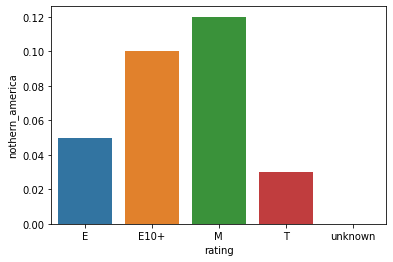

In [73]:
fig = plt.figure()

sns.barplot(data=rating_per_region, x="rating", y="nothern_america")

plt.show()

В Северной Америке больше всего продается игр рейтингов: М, E10+. 

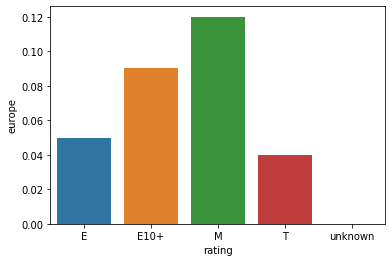

In [74]:
fig = plt.figure()

sns.barplot(data=rating_per_region, x="rating", y="europe" )
plt.show()

В Европе самыми популярными рейтингами игр являются: M, E10+

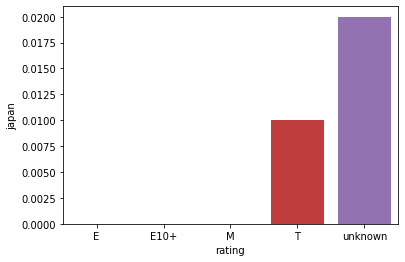

In [76]:
fig = plt.figure()

sns.barplot(data=rating_per_region, x="rating", y="japan")
plt.show()

В Японии самые популярные игры с неопределенным жанром

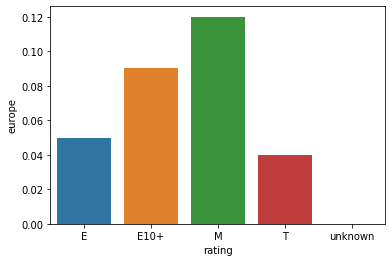

In [77]:
fig = plt.figure()

sns.barplot(data=rating_per_region, x="rating", y="europe" )
plt.show()

В Европе самыми популярными играми являются с рейтингами: Т и популярны игры с неопределенным жанром

Европа и Америка  спохожи в своих предпонинях. 

В Японии самые популярные игры неопределенным жанром

<b><p style="font-size: 20px;"> Проверка гипотезы</p></b>

Формулируем нулевую гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
    

Формулируем альтернативную гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC неодинаковые

In [80]:

current_platform.dropna(subset = ['user_score'],inplace = True)
x_one_platform = current_platform.query('platform == "XOne"')
x_one_platform= x_one_platform['user_score']
pc_platform = current_platform.query('platform == "PC"')
pc_platform= pc_platform['user_score']



In [81]:

alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(
    x_one_platform, 
    pc_platform)

print('p-значение: {:.5f}'.format(results.pvalue))

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")  

p-значение: 0.10451
Не получилось отвергнуть нулевую гипотезу


исходя из значения p-value можно сделать вывод - Средние пользовательские рейтинги платформ Xbox One и PC неодинаковые

Формулируем нулевую гипотезу: Средние пользовательские рейтинги жанров Action и Sports одинаковые.

Формулируем альтернативную гипотезу: Средние пользовательские рейтинги жанров Action и Sports  не одинаковые.

In [83]:
mean_top_genres_Action = current_platform.query('genre == "Action"')
mean_top_genres_Action = mean_top_genres_Action['user_score']
mean_top_genres_Sports = current_platform.query('genre == "Sports"')
mean_top_genres_Sports = mean_top_genres_Sports['user_score']


In [84]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(
    mean_top_genres_Action, 
    mean_top_genres_Sports)

print('p-значение: {:.5f}' .format(results.pvalue))

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.00000
Отвергаем нулевую гипотезу


исходя из значения p-value можно сделать вывод - Средние пользовательские рейтинги жанров Action и Sports не одинаковые.

<b><p style="font-size: 20px;"> Выводы</p></b>

При анализе предоставленных данных были изучены предпочтения игроков для выявления потенциально популярных продуктов и спланировать рекламные кампании.

Были изучены данные из датасета. Названия столбцов были приведены к нижнему регистру.
Были определены пустые значения в датасете.
в столбце 'user score' было найденозначение 'tbd'.
Аббревиатура 'tbd' означает, что на момент выгрузки датафрейма рейтинг не был определен. соответственно его имеет смысл заполнить пропусками, тк строки с этим значением превышают 10% от датафрейма - удалять их не стоит, что позволит в дальнейшем проводить корректный анализ

тк тип данных в 'user score' - не численный, по этому переводим в цифровой фармат.
Добавляем новый столбец 'total_sale' и считаем общие продажи по каждой игре.
Выяляем нулевые значения в столбце 'year_of_release'. И исключаем их из датасета, тк эти игры могут быть еще не выпущены в релиз.

Строим график, в котором отображаем жизненный цикл игровых платформ .

на диаграммме видно платформа 2600 была самая первая платформа. Просуществовала чуть менее 10 лет. У большинства платформ заканчивается жизненный цикл, так как на этих платформах выускается все меньше и меньше игр. Самая актуальная платформа - РS4 так как все больше и больше игр начинают выпускать для этой платформе 
Выбираем актуальный период для игровых платформ - все платформы дя которых выпускаются игры на2016 год.

Выявляем самые прибыльные платформы: X360, PS3, Wii

Строим график Распределение по глобальным продажам в разбивке по платформам. На графике видно для каких платформ было больше всено продано игр. Самые погкпаемые игры для платформ: Wii, X360, PS3. меньше всего игр было куплено игр для платформ РС. Это говорит о том что игровые платформы получили бурный рост по сравнению с играми ля ПК.

Определяем влияние оценок критиков и пользователей на объем продаж по 6 самым прибольным платформам.

Определяем самые популярные жанры игр. Самые полулярные игры: экшен, шутеры и спортивные игры. не популярные - приключени, стратегии и пазлы.

Определяем портрет  пользователя каждого региона.

Платформа Х360 является самой популярной платформой в Северной Америке и воро по популярности в Европе. В Японии эта платформа не популярна

Платформы Wii, PS3 является популярной во всех регионах.

Самыми популярными платформами в Северной Америке и Европе являются: Экшн, Шутеры, Спорт. В Японии самой популярной платформой является ролевые игры, затем идут Экшн, и шутеры.

Исходя из этого видно что самыми популярными жанрами в 3-х регионах являются Экшн и спорт.

Определяем жанры самых популярных игр. Во всех регионах популярные игры имеют одинаковые рейтинги:  Е, М, Т.

На этапе проверки гипотез мы сформулировали нулевые и альтернативные гипотизы.

При проверке гипотиз использовал значение alpha =0.05 - критический уровень статистической значимости, тк выборка позволяет использовать менее строгий уровень значимости.

Формулируем  первую нулевую гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Формулируем первую альтернативную гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC неодинаковые

p-значение: 0.00001

Отвергаем нулевую гипотезу

исходя из значения p-value можно сделать вывод - Средние пользовательские рейтинги платформ Xbox One и PC неодинаковые


Формулируем вторую нулевую гипотезу: Средние пользовательские рейтинги жанров Action и Sports одинаковые.

Формулируем вторую альтернативную гипотезу: Средние пользовательские рейтинги жанров Action и Sports не одинаковые.

p-значение: 0.04477

Отвергаем нулевую гипотезу

исходя из значения p-value можно сделать вывод - Средние пользовательские рейтинги жанров Action и Sports не одинаковые.